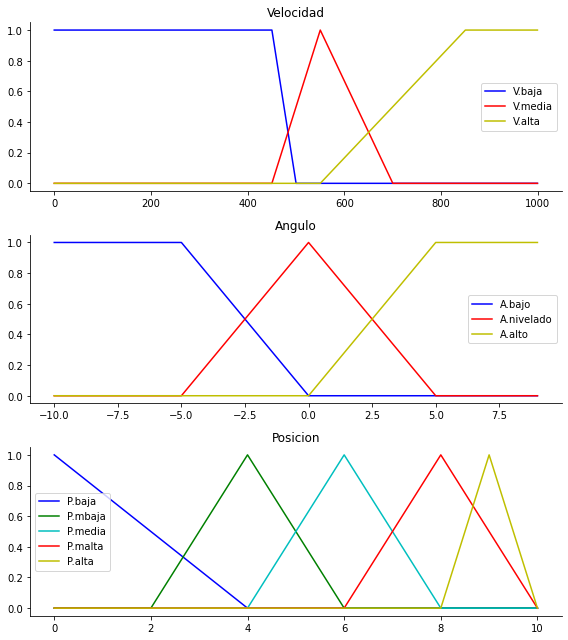

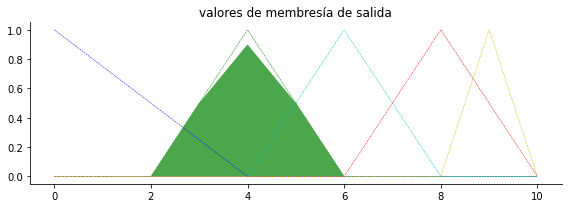

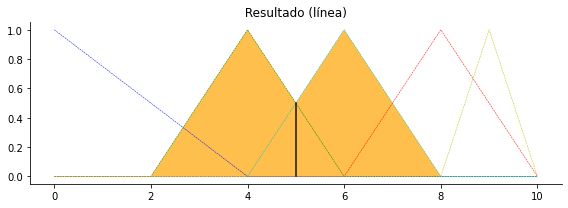

In [22]:
# Juan Pablo Lopez Ramirez - Computacion Lambda

# CONTROL DIFUSO

# Encontrar la posicion del timon a partir de la velocidad y el angulo
# respecto una linea de vuelo

# Importar librerías
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
'''
Problema:  un avion esta sujeto a turbulencias, las que causan que el avion
baje o suba bruscamente formando un angulo respecto de su linea de vuelo.
se queire diseñar un sistema de control difuso para que un piloto 
automatico responda al problema de turbulencia ajustando la posicion 
del timon de la aeronave. 


Se pide calcular la posicion del timon si el avion vuela a 515kmph y por 
la tubulencia se formo un angulo de -2.5 grados respecto a su linea de vuelo.
'''
# Generar variables del universo
x_velocidad = np.arange(0, 1000, 1) # de 0 a 1000 kmph
x_angulo = np.arange(-10, 10, 1) # de -10 a 10 grados.
x_posicion = np.arange(0, 11, 1) # de 0 a 10 cm. 

# Generar funciones de pertenencia difusas
# conjuntos difusos (velocidad)
velocidad_baja = fuzz.trapmf(x_velocidad, [0,0,450,500])
velocidad_media = fuzz.trimf(x_velocidad, [450, 550, 700])
velocidad_alta = fuzz.trapmf(x_velocidad, [550, 850, 1000, 1000])

# conjuntos difusos (angulo)
angulo_bajo = fuzz.trapmf(x_angulo, [-10, -10, -5, 0])
angulo_nivelado = fuzz.trimf(x_angulo, [-5, 0, 5])
angulo_alto = fuzz.trapmf(x_angulo, [0, 5, 10, 10])

# conjuntos difusos (posicion)
posicion_baja = fuzz.trapmf(x_posicion, [0,0,0,4])
posicion_media_baja = fuzz.trimf(x_posicion, [2, 4, 6])
posicion_media = fuzz.trimf(x_posicion, [4, 6, 8])
posicion_media_alta = fuzz.trimf(x_posicion, [6, 8, 10])
posicion_alta = fuzz.trimf(x_posicion, [8, 9, 10])


# Visualizar estos universos y funciones de pertenencia.
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))
ax0.plot(x_velocidad, velocidad_baja, 'b', linewidth=1.5, label='V.baja')
ax0.plot(x_velocidad, velocidad_media, 'r', linewidth=1.5, label='V.media')
ax0.plot(x_velocidad, velocidad_alta, 'y', linewidth=1.5, label='V.alta')
ax0.set_title('Velocidad')
ax0.legend()

ax1.plot(x_angulo, angulo_bajo, 'b', linewidth=1.5, label='A.bajo')
ax1.plot(x_angulo, angulo_nivelado, 'r', linewidth=1.5, label='A.nivelado')
ax1.plot(x_angulo, angulo_alto, 'y', linewidth=1.5, label='A.alto')
ax1.set_title('Angulo')
ax1.legend()

ax2.plot(x_posicion, posicion_baja, 'b', linewidth=1.5, label='P.baja')
ax2.plot(x_posicion, posicion_media_baja, 'g', linewidth=1.5, label='P.mbaja')
ax2.plot(x_posicion, posicion_media, 'c', linewidth=1.5, label='P.media')
ax2.plot(x_posicion, posicion_media_alta, 'r', linewidth=1.5, label='P.malta')
ax2.plot(x_posicion, posicion_alta, 'y', linewidth=1.5, label='P.alta')
ax2.set_title('Posicion')
ax2.legend()

# Ocultar los ejes superior / derecho
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()

#---------------------------------------------------------------------------------------

# Necesitamos la activación de nuestras funciones de pertenencia difusa en estos valores.
# ¡Para esto existe fuzz.interp_membership!
nivel_velocidad_baja = fuzz.interp_membership(x_velocidad, velocidad_baja, 0)
nivel_velocidad_media = fuzz.interp_membership(x_velocidad, velocidad_media, 0.65)
nivel_velocidad_alta = fuzz.interp_membership(x_velocidad, velocidad_alta, 0)

nivel_angulo_bajo = fuzz.interp_membership(x_angulo, angulo_bajo, 0.5)
nivel_angulo_nivelado = fuzz.interp_membership(x_angulo, angulo_nivelado, 0.5)
nivel_angulo_alto = fuzz.interp_membership(x_angulo, angulo_alto, 0)

# reglas:
'''
1-If velocidad es "alta" AND angulo es "alto" THEN posicion es "alta"--> posicion = MIN(0,0)=0
2-If velocidad es "alta" AND angulo es "nivelado" THEN posicion es "media alta"--> posicion = MIN(0,0.5)=0
3-If velocidad es "alta" AND angulo es "bajo" THEN posicion es "media alta"--> posicion = MIN(0,0.5)=0

4-If velocidad es "media" AND angulo es "alto" THEN posicion es "media alta"--> posicion = MIN(0.65,0)=0
5-If velocidad es "media" AND angulo es "nivelado" THEN posicion es "media"--> posicion = MIN(0.65,0.5)=0.5
6-If velocidad es "media" AND angulo es "bajo" THEN posicion es "media baja"--> posicion = MIN(0.65,0.5)=0.5

7-If velocidad es "baja" AND angulo es "alto" THEN posicion es "media baja"--> posicion = MIN(0,0)=0
8-If velocidad es "baja" AND angulo es "nivelado" THEN posicion es "media baja"--> posicion = MIN(0,0.5)=0
9-If velocidad es "baja" AND angulo es "bajo" THEN posicion es "baja"--> posicion = MIN(0,0.5)=0
'''

# Ahora tomamos nuestras reglas y las aplicamos. 

# regla 1
activar_regla1 = np.fmin(nivel_velocidad_alta, nivel_angulo_alto)
# para la regla 1
activacion_posicion_alta = np.fmin(activar_regla1, posicion_alta) 

# regla 2
activar_regla2 = np.fmin(nivel_velocidad_alta, nivel_angulo_nivelado)
# para la regla 2
activacion_posicion_media_alta = np.fmin(activar_regla2, posicion_media_alta) 

# regla 3
activar_regla3 = np.fmin(nivel_velocidad_alta, nivel_angulo_bajo)
# para la regla 3
activacion_posicion_media_alta = np.fmin(activar_regla3, posicion_media_alta) 

# regla 4
activar_regla4 = np.fmin(nivel_velocidad_media, nivel_angulo_alto)
# para la regla 4
activacion_posicion_media_alta = np.fmin(activar_regla4, posicion_media_alta) 

# regla 5
activar_regla5 = np.fmin(nivel_velocidad_media, nivel_angulo_nivelado)
# para la regla 5
activacion_posicion_media = np.fmin(activar_regla5, posicion_media) 

# regla 6
activar_regla6 = np.fmin(nivel_velocidad_media, nivel_angulo_bajo)
# para la regla 6
activacion_posicion_media_baja = np.fmin(activar_regla6, posicion_media_baja) 

# regla 7
activar_regla7 = np.fmin(nivel_velocidad_baja, nivel_angulo_alto)
# para la regla 7
activacion_posicion_media_baja = np.fmin(activar_regla7, posicion_media_baja) 

# regla 8
activar_regla8 = np.fmin(nivel_velocidad_baja, nivel_angulo_nivelado)
# para la regla 8
activacion_posicion_media_baja = np.fmin(activar_regla8, posicion_media_baja)

# regla 9
activar_regla9 = np.fmin(nivel_velocidad_baja, nivel_angulo_bajo)
# para la regla 9
activacion_posicion_baja = np.fmin(activar_regla9, posicion_baja)

posicion0 = np.zeros_like(x_posicion)

# Visualizar lo anterior
fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.fill_between(x_posicion, posicion0, activacion_posicion_baja, facecolor='b', alpha=0.7)
ax0.plot(x_posicion, posicion_baja, 'b', linewidth=0.5, linestyle='--', )

ax0.fill_between(x_posicion, posicion0, activacion_posicion_media_baja, facecolor='g', alpha=0.7)
ax0.plot(x_posicion, posicion_media_baja, 'g', linewidth=0.5, linestyle='--', )

ax0.fill_between(x_posicion, posicion0, activacion_posicion_media, facecolor='c', alpha=0.7)
ax0.plot(x_posicion, posicion_media, 'c', linewidth=0.5, linestyle='--', )

ax0.fill_between(x_posicion, posicion0, activacion_posicion_media_alta, facecolor='r', alpha=0.7)
ax0.plot(x_posicion, posicion_media_alta, 'r', linewidth=0.5, linestyle='--')

ax0.fill_between(x_posicion, posicion0, activacion_posicion_alta, facecolor='y', alpha=0.7)
ax0.plot(x_posicion, posicion_alta, 'y', linewidth=0.5, linestyle='--')

ax0.set_title('valores de membresía de salida')

# Cancelar los ejes superior / derecho
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()
#----------------------------------------------------------------------------------------------

# Agregar las cinco funciones de pertenencia de salida juntas
agregado = np.fmax(activacion_posicion_baja, 
np.fmax(posicion_media_baja, 
np.fmax(posicion_media,
np.fmax(activacion_posicion_media_alta, activacion_posicion_alta))))

# Calcular el resultado difuso
posicion = fuzz.defuzz(x_posicion, agregado, 'centroid')
activacion_posicion = fuzz.interp_membership(x_posicion, agregado, posicion) # Para dibujar

# Visualizar lo anterior
fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.plot(x_posicion, posicion_baja, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_posicion, posicion_media_baja, 'g', linewidth=0.5, linestyle='--', )
ax0.plot(x_posicion, posicion_media, 'c', linewidth=0.5, linestyle='--')
ax0.plot(x_posicion, posicion_media_alta, 'r', linewidth=0.5, linestyle='--')
ax0.plot(x_posicion, posicion_alta, 'y', linewidth=0.5, linestyle='--')
ax0.fill_between(x_posicion, posicion0, agregado, facecolor='Orange', alpha=0.7)
ax0.plot([posicion, posicion], [0, activacion_posicion], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title(' Resultado (línea) ')

# Cancela los ejes superior / derecho
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
plt.tight_layout()

In [21]:
# BUENO RECORDEMOS QUE ERA LO QUE ESTABAMOS BUSCANDO
# LA PREGUNTA ERA:
# Se pide calcular la posicion del timon si el avion vuela a 515 Kilometros por hora 
# y por la tubulencia se formo un angulo de -2.5 grados respecto a su linea de vuelo.

# entonces en la ultima grafica podemos ver el resultado , en este caso la grafica nos dice
# que la posicion del timon del avion debe estar a ( 5cm ).